In [27]:
import pandas as pd
import numpy as np

df=pd.read_excel('C.xlsx',sheet_name='TICKETS')
df1=pd.read_excel('C.xlsx',sheet_name='ACCOUNTS')


In [1]:

# Convert date strings to datetime objects


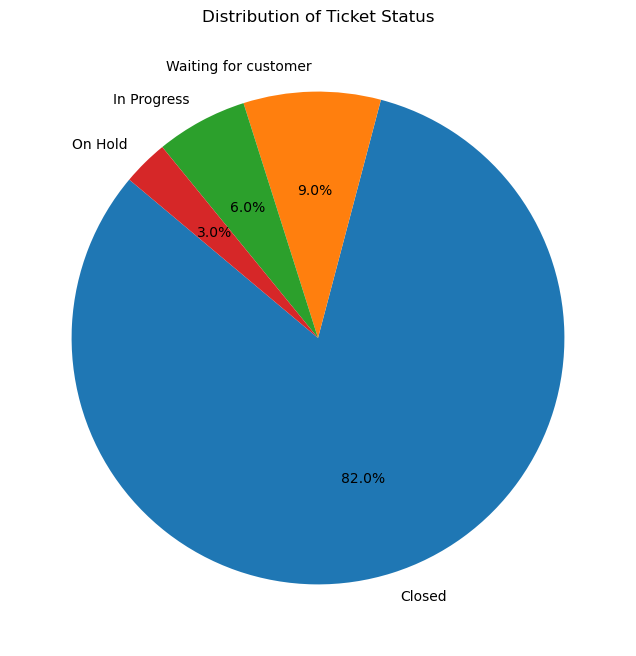

In [28]:
df
import matplotlib.pyplot as plt

status_counts = df['Ticket Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ticket Status')
plt.show()



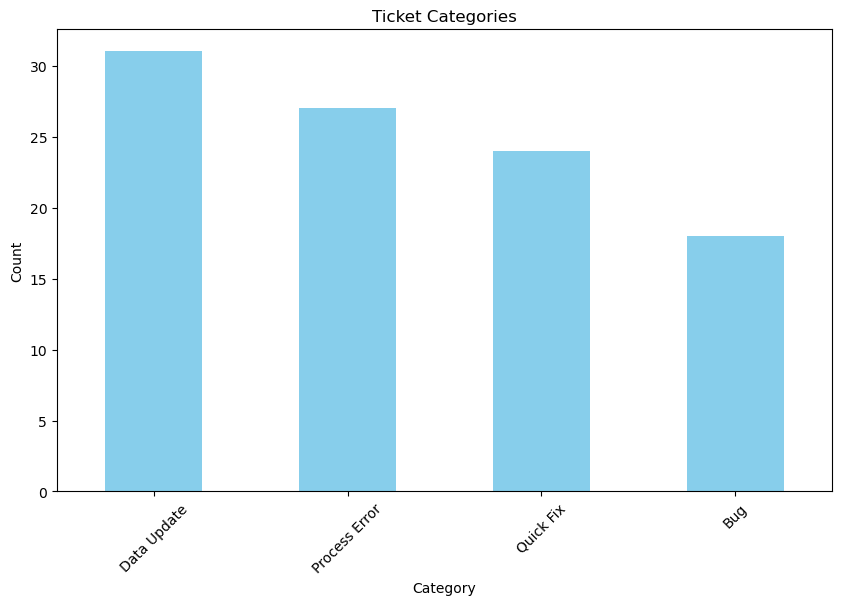

In [29]:
type_counts = df['Type of Issue'].value_counts()
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Ticket Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



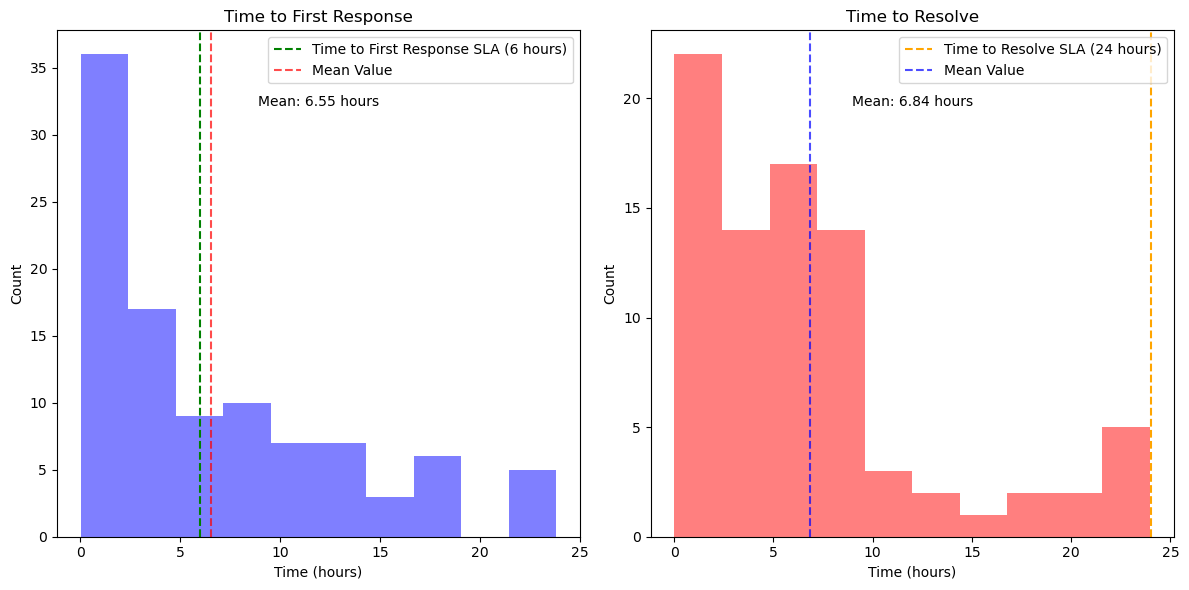

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram for Time to First Response
n1, bins1, patches1 = ax1.hist(df['Time_to_First'], bins=10, alpha=0.5, color='blue')
ax1.set_title('Time to First Response')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Count')

# Add vertical line for the Time to First Response SLA (6 hours)
ax1.axvline(x=6, color='green', linestyle='--', label='Time to First Response SLA (6 hours)')
ax1.legend()

# Calculate the mean for Time to First Response
mean1 = np.mean(df['Time_to_First'])

# Add text annotation for the mean
ax1.annotate(f"Mean: {mean1:.2f} hours", xy=(0.5, 0.85), xycoords='axes fraction', ha='center', fontsize=10, color='black')

# Add vertical line for the mean value
ax1.axvline(x=mean1, color='red', linestyle='--', label='Mean Value', alpha=0.7)
ax1.legend()

# Plot the histogram for Time to Resolve
n2, bins2, patches2 = ax2.hist(df['Time_to_Resolve'], bins=10, alpha=0.5, color='red')
ax2.set_title('Time to Resolve')
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Count')

# Add vertical line for the Time to Resolve SLA (24 hours)
ax2.axvline(x=24, color='orange', linestyle='--', label='Time to Resolve SLA (24 hours)')
ax2.legend()

# Calculate the mean for Time to Resolve
mean2 = np.mean(df['Time_to_Resolve'])

# Add text annotation for the mean
ax2.annotate(f"Mean: {mean2:.2f} hours", xy=(0.5, 0.85), xycoords='axes fraction', ha='center', fontsize=10, color='black')

# Add vertical line for the mean value
ax2.axvline(x=mean2, color='blue', linestyle='--', label='Mean Value', alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.show()


In [47]:
df.describe()

,Time_to_First,Time_to_Resolve
count,100.000000,82.000000
mean,6.548590,6.835147
std,6.318114,6.255857
min,0.018000,0.016944
25%,1.584250,2.225361
50%,4.398500,5.558619
75%,9.968250,8.733487
max,23.827000,23.967180


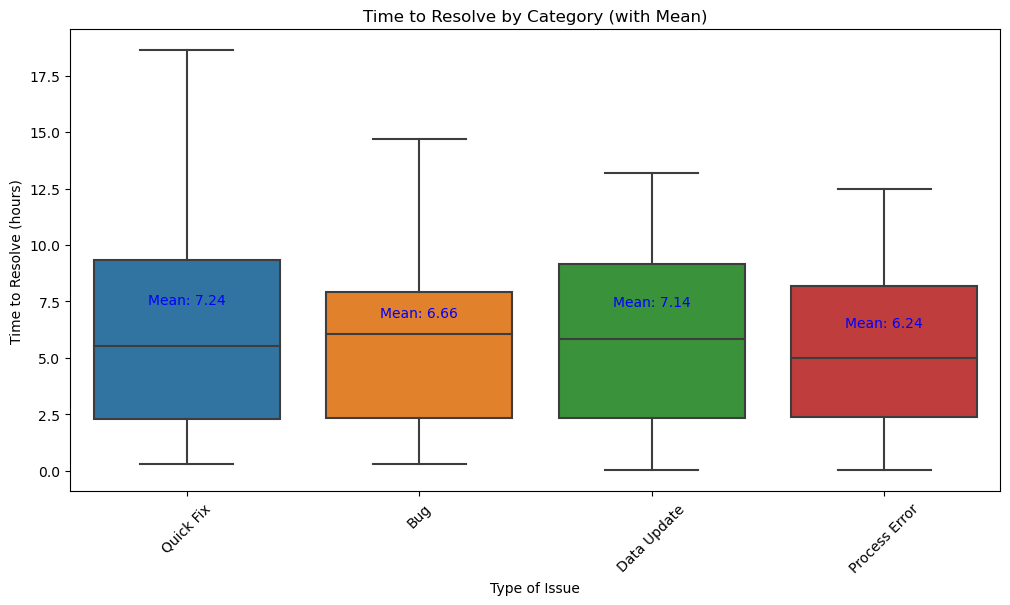

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type of Issue', y='Time_to_Resolve', showfliers=False)

# Calculate the means for each category
means = df.groupby('Type of Issue')['Time_to_Resolve'].mean()

# Annotate the means on the plot
for i, category in enumerate(df['Type of Issue'].unique()):
    plt.text(i, means[category], f"Mean: {means[category]:.2f}", ha='center', va='bottom', fontsize=10, color='b')

plt.title('Time to Resolve by Category (with Mean)')
plt.xticks(rotation=45)
plt.xlabel('Type of Issue')
plt.ylabel('Time to Resolve (hours)')
plt.show()

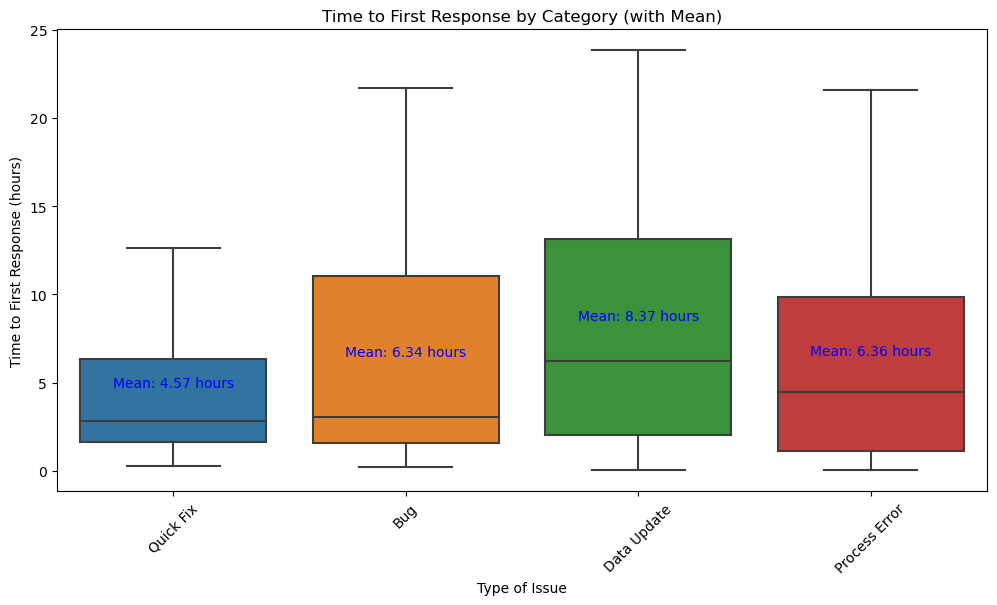

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type of Issue', y='Time_to_First', showfliers=False)

# Calculate the means for each category
means = df.groupby('Type of Issue')['Time_to_First'].mean()

# Annotate the means on the plot
for i, category in enumerate(df['Type of Issue'].unique()):
    plt.text(i, means[category], f"Mean: {means[category]:.2f} hours", ha='center', va='bottom', fontsize=10, color='b')

plt.title('Time to First Response by Category (with Mean)')
plt.xticks(rotation=45)
plt.xlabel('Type of Issue')
plt.ylabel('Time to First Response (hours)')
plt.show()


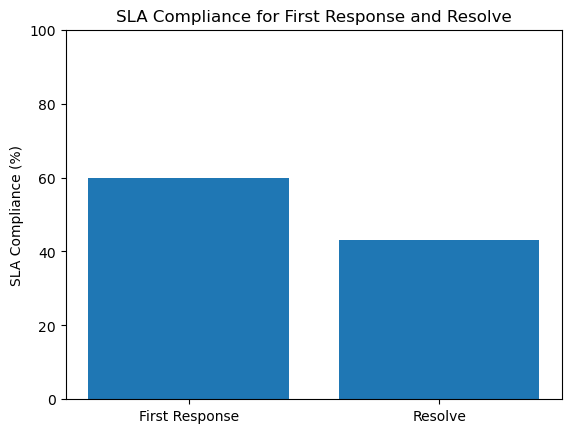

In [33]:
import matplotlib.pyplot as plt

# Calculate SLA compliance for Time to First Response
first_response_sla = 6
resolve_sla = 24

sla_compliance = df[['Time_to_First', 'Time_to_Resolve']].applymap(lambda x: x <= first_response_sla).mean() * 100

plt.bar(['First Response', 'Resolve'], sla_compliance)
plt.ylim(0, 100)
plt.ylabel('SLA Compliance (%)')
plt.title('SLA Compliance for First Response and Resolve')
plt.show()


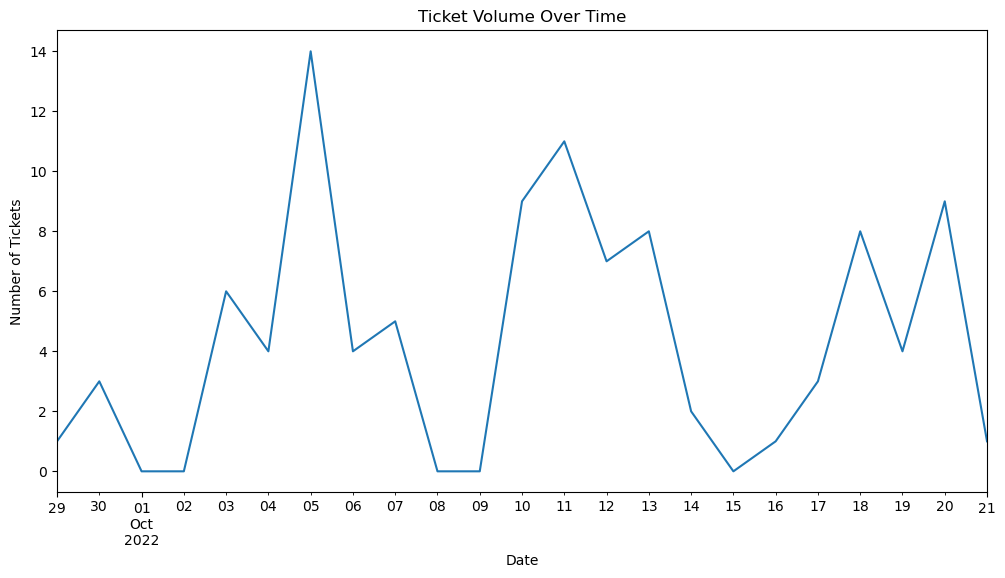

In [38]:
import matplotlib.pyplot as plt

# Assuming you have a datetime column 'Created Date'
df['Created_Date'] = pd.to_datetime(df['Created_Date'])
df.set_index('Created_Date', inplace=True)

plt.figure(figsize=(12, 6))
df['Ticket Number'].resample('D').count().plot()
plt.title('Ticket Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.show()


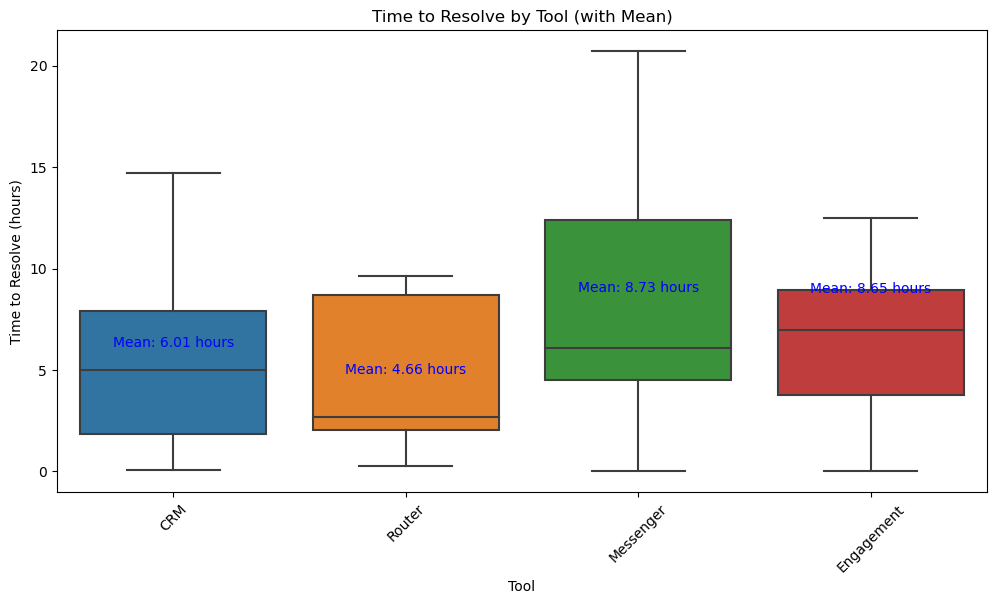

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Tool', y='Time_to_Resolve', showfliers=False)

# Calculate and annotate means on the plot
means = df.groupby('Tool')['Time_to_Resolve'].mean()
for i, tool in enumerate(df['Tool'].unique()):
    plt.text(i, means[tool], f"Mean: {means[tool]:.2f} hours", ha='center', va='bottom', fontsize=10, color='b')

plt.title('Time to Resolve by Tool (with Mean)')
plt.xticks(rotation=45)
plt.xlabel('Tool')
plt.ylabel('Time to Resolve (hours)')
plt.show()

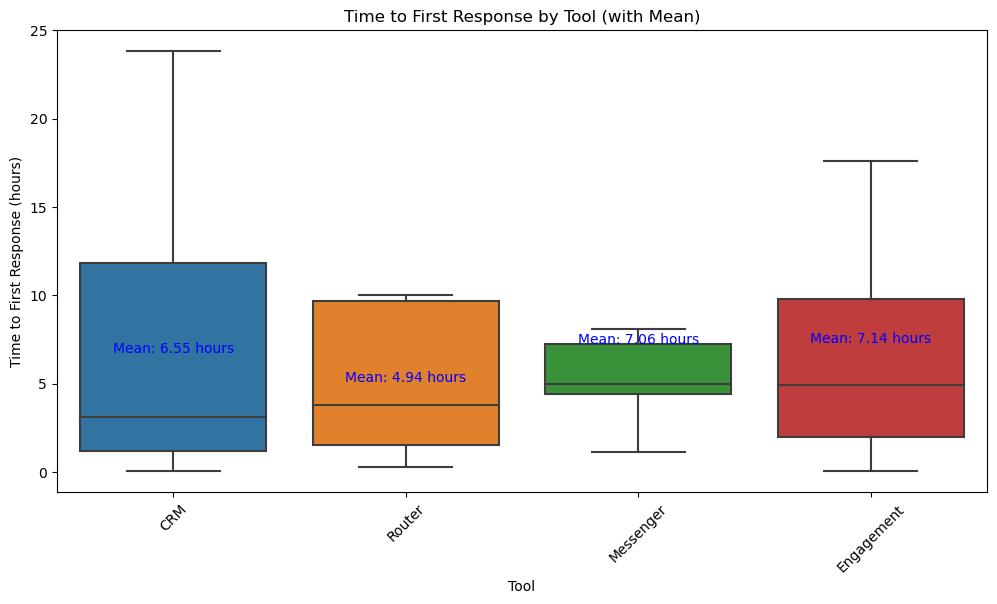

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Tool', y='Time_to_First', showfliers=False)

# Calculate and annotate means on the plot
means = df.groupby('Tool')['Time_to_First'].mean()
for i, tool in enumerate(df['Tool'].unique()):
    plt.text(i, means[tool], f"Mean: {means[tool]:.2f} hours", ha='center', va='bottom', fontsize=10, color='b')

plt.title('Time to First Response by Tool (with Mean)')
plt.xticks(rotation=45)
plt.xlabel('Tool')
plt.ylabel('Time to First Response (hours)')
plt.show()

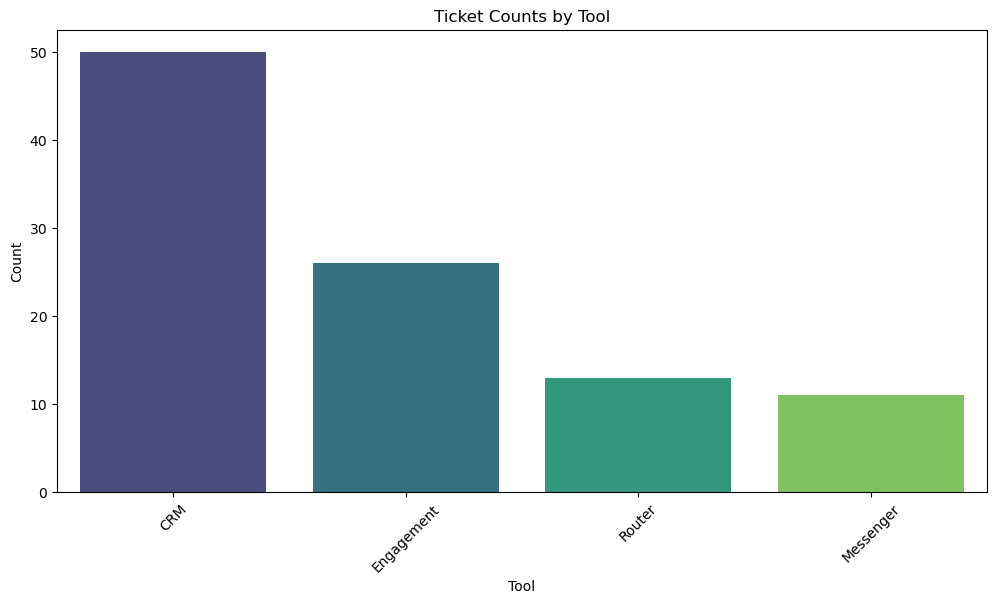

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create a count plot for the "Tool" column
sns.countplot(data=df, x='Tool', order=df['Tool'].value_counts().index, palette='viridis')

plt.title('Ticket Counts by Tool')
plt.xlabel('Tool')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


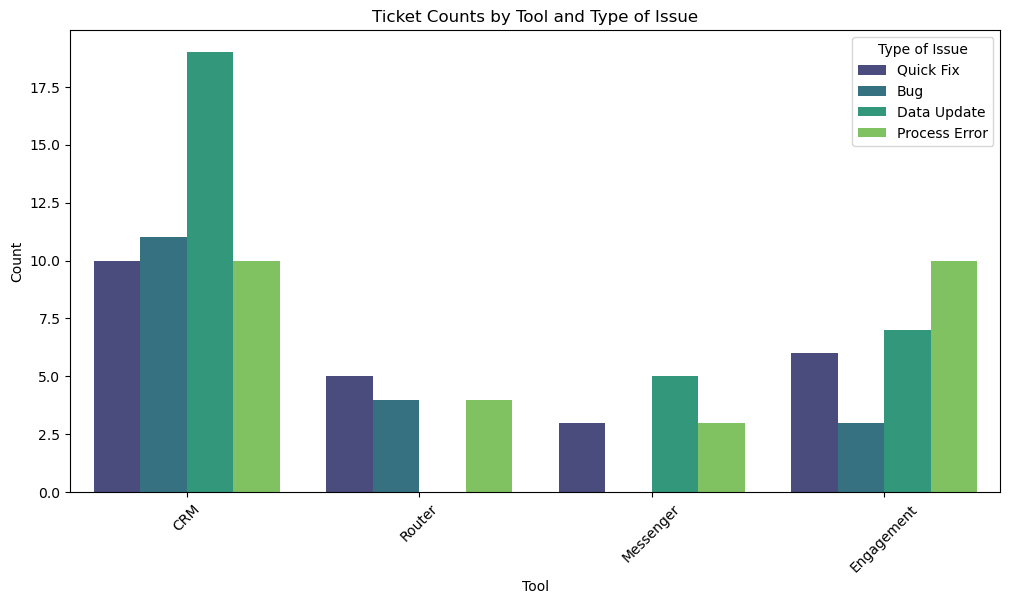

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create a count plot for the "Tool" column, grouped by "Type of Issue"
sns.countplot(data=df, x='Tool', hue='Type of Issue', palette='viridis')

plt.title('Ticket Counts by Tool and Type of Issue')
plt.xlabel('Tool')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type of Issue')
plt.show()


In [55]:
df1

,Account Name,Date Created,Created By,Contact Name,Phone,Has Email
0,Gourmet Apple Bar and Grille,2022-04-04,Isabel,Mason Slater,7.363532e+09,1
1,Feeling Saucy Pizzeria,2021-08-30,Camila,Dawson Castillo,3.373413e+09,0
2,The Painted Fence,2021-11-16,Juliana,Bella Hunter,7.618863e+09,0
3,Arch,2022-03-16,Valentina,Lane Davis,1.004066e+09,0
4,Loyal Bazaar Kitchen,2022-08-29,Pedro,Ricky Hale,3.905631e+09,1
...,...,...,...,...,...,...
95,The All Around Pizzeria,2020-09-05,Pedro,Skyler Houghton,3.022102e+09,0
96,Secret Rest Espresso Bar,2020-09-14,Pedro,Kit Cash,7.757861e+09,0
97,Gentle,2022-06-04,Valentina,Mattie Maxwell,3.557382e+09,1
98,Mellow Blaze House,2020-11-28,Santiago,Dulce Barry,5.135137e+09,1


In [56]:
df1.dtypes

Account Name            object
Date Created    datetime64[ns]
Created By              object
Contact Name            object
Phone                  float64
Has Email                int64
dtype: object

In [57]:
df1.describe()

,Phone,Has Email
count,1.000000e+02,100.000000
mean,5.268161e+09,0.530000
std,2.340551e+09,0.501614
min,7.867201e+07,0.000000
25%,3.599612e+09,0.000000
50%,5.135353e+09,1.000000
75%,7.363532e+09,1.000000
max,9.473913e+09,1.000000


In [88]:
import pandas as pd

# Assuming your data is in a DataFrame named 'df1'

df1=pd.read_excel('C.xlsx',sheet_name='ACCOUNTS')

# Date Format Standardization (assuming the date format is mmm dd, yyyy)
df1['Date Created'] = pd.to_datetime(df1['Date Created'], format='%b %d, %Y')

# Duplicate Removal
df1 = df1.drop_duplicates()
df1


,Account Name,Date Created,Created By,Contact Name,Phone,Has Email
0,Gourmet Apple Bar and Grille,2022-04-04,Isabel,Mason Slater,7.363532e+09,1
1,Feeling Saucy Pizzeria,2021-08-30,Camila,Dawson Castillo,3.373413e+09,0
2,The Painted Fence,2021-11-16,Juliana,Bella Hunter,7.618863e+09,0
3,Arch,2022-03-16,Valentina,Lane Davis,1.004066e+09,0
4,Loyal Bazaar Kitchen,2022-08-29,Pedro,Ricky Hale,3.905631e+09,1
...,...,...,...,...,...,...
95,The All Around Pizzeria,2020-09-05,Pedro,Skyler Houghton,3.022102e+09,0
96,Secret Rest Espresso Bar,2020-09-14,Pedro,Kit Cash,7.757861e+09,0
97,Gentle,2022-06-04,Valentina,Mattie Maxwell,3.557382e+09,1
98,Mellow Blaze House,2020-11-28,Santiago,Dulce Barry,5.135137e+09,1


In [89]:
# Assuming your data is in a DataFrame named 'df1'
import pandas as pd

# Data Standardization
df1['Account Name'] = df1['Account Name'].str.strip()
df1['Created By'] = df1['Created By'].str.strip()
df1['Contact Name'] = df1['Contact Name'].str.strip()


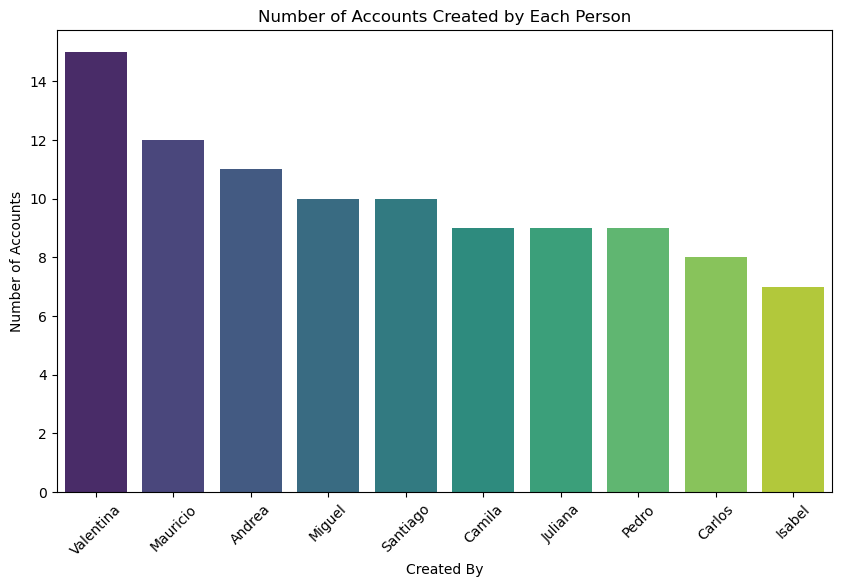

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df1'

# Count the number of accounts created by each person
account_counts = df1['Created By'].value_counts().reset_index()
account_counts.columns = ['Created By', 'Account Count']

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Created By', y='Account Count', data=account_counts, palette='viridis')
plt.title('Number of Accounts Created by Each Person')
plt.xlabel('Created By')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)
plt.show()


In [71]:
duplicated_rows = df1[df1.duplicated(subset='Account Name', keep=False)]

# Display the duplicated rows
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
                     Account Name Date Created Created By     Contact Name  \
2               The Painted Fence   2021-11-16    Juliana     Bella Hunter   
4            Loyal Bazaar Kitchen   2022-08-29      Pedro       Ricky Hale   
7          The Pizza Bro Pizzeria   2022-04-26  Valentina   Hayden Everett   
8                    Little China   2022-09-13      Pedro      Jude Pearce   
13              The Painted Fence   2020-03-29  Valentina  Glenn Macdonald   
15                 The Big Spices   2022-01-28     Isabel      Gabe Jordan   
18  Flying Ingredients Coffee Bar   2020-10-21     Camila    Elliana Stout   
21         Ebony Temptations Cafe   2021-10-19     Andrea     Kayla Harris   
28             The Golden Parlour   2021-02-25     Isabel  Louis Jefferson   
29         Ebony Temptations Cafe   2020-02-21  Valentina     Kayla Harris   
31                  The Urban Way   2021-06-06   Mauricio  Cassandra House   
33        Wide Awake Luncheonette   2021-05-01 